<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [23]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [24]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        '''The class Quad tkaes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''
        self.func = fuc
        self.grind = N
        self.lower_bound = a
        self.upper_bound = b

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [25]:
# Add the following to the class in part A). 
def mid_quad(self, a, b):
    return (b - a) * func((a + b) / 2)
def trapz_quad(self, a, b):
    return (b - a) / 2 * (func(a) + func(b))
def simpson_quad(self, a, b):
    return (b - a) / 3 * (func(a) + 4 * func((a + b) / 2)) + func(b)



<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>Since the interval of the intergral is given as a, b, we can then just replace the $x_i$ with our formula, then once we sum up N times, then over all will just be $\frac{b-a}{2}$ times the $\sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$
<br>
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

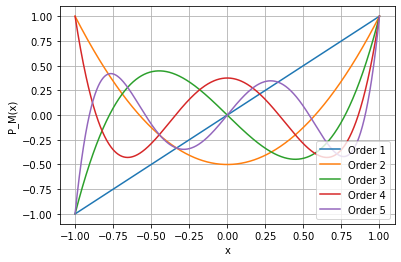

In [26]:
from scipy.special import legendre
class Gauss_Quad_ (Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)
        self.order = order
    def legendre_poly(self,x):
        return legendre(self.order)(x)
    def plot_legendre_polynomials(self):
        
        x = np.linspace(self.lower_bound, self.upper_bound, 1000)
        y = [self.legendre_poly(xi) for xi in x]
        plt.plot(x, y, label=f'Order {self.order}')

        

orders = [1, 2, 3, 4, 5]
a = -1
b = 1
n = 50
x = np.linspace(-1, 1, 1000)
for order in orders:
    gauss_quad = Gauss_Quad_(legendre(order)(x), n, a, b, order)
    gauss_quad.plot_legendre_polynomials()

plt.xlabel('x')
plt.ylabel(f'P_M(x)')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [27]:
# Add the following to the class in part D). \
import numpy as np
from scipy.optimize import newton
from scipy.special import legendre

def newton_method_root(M, a, b):
    def legendre_polynomial(x, M):
        return legendre(M)(x)

    def legendre_derivative(x, M):
        return M / (x**2 - 1) * (x * legendre_polynomial(x, M) - legendre(M - 1)(x))
    
    roots = []
    weights = []
    
    for m in range(1, M + 1):
        x_0 = np.cos((4 * m - 1) * np.pi / (4 * M + 2))
        root = newton(legendre_polynomial, x_0, args = (m,))
        
        weight = 2 / ((1 - root**2) * legendre(m).deriv()(root)**2)
        
        roots.append(root)
        weights.append(weight)
        
    return np.array(roots), np.array(weights)

def save_to_file(filename, M_values, roots, weights):
    with open(filename, 'w') as file:
        file.write("M\tRoots\tWeights\n")
        for M, root, weight in zip(M_values, roots, weights):
            file.write(f"{M}\t{root}\t{weight}\n")

a = -1
b = 1

roots_list = []
weights_list = []

for M in orders:
    roots, weights = newton_method_root(M, a, b)
    roots_list.append(roots)
    weights_list.append(weights)

print(roots_list)
print(weights_list)
save_to_file("gaussian_quadrature_results.txt", orders, roots_list, weights_list)


[array([0.]), array([ 0.        , -0.57735027]), array([ 0.        ,  0.57735027, -0.77459667]), array([ 0.00000000e+00,  5.77350269e-01, -4.41761450e-29, -8.61136312e-01]), array([ 0.00000000e+00,  5.77350269e-01,  7.86843967e-32, -3.39981044e-01,
       -9.06179846e-01])]
[array([2.]), array([2., 1.]), array([2.        , 1.        , 0.55555556]), array([2.        , 1.        , 0.88888889, 0.34785485]), array([2.        , 1.        , 0.88888889, 0.65214515, 0.23692689])]


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [28]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
rootslist = []
weightslist = []
def scipy_method_root(M):
    
    root, weight = roots_legendre(M)
    rootslist.append(root)
    weightslist.append(weight)
    return root,weight


for order in orders:
    print(order)
    print(scipy_method_root(order))

print(roots_list)
print(weightslist)

1
(array([0.]), array([2.]))
2
(array([-0.57735027,  0.57735027]), array([1., 1.]))
3
(array([-0.77459667,  0.        ,  0.77459667]), array([0.55555556, 0.88888889, 0.55555556]))
4
(array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485]))
5
(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]), array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))
[array([0.]), array([ 0.        , -0.57735027]), array([ 0.        ,  0.57735027, -0.77459667]), array([ 0.00000000e+00,  5.77350269e-01, -4.41761450e-29, -8.61136312e-01]), array([ 0.00000000e+00,  5.77350269e-01,  7.86843967e-32, -3.39981044e-01,
       -9.06179846e-01])]
[array([2.]), array([1., 1.]), array([0.55555556, 0.88888889, 0.55555556]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485]), array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689])]


## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [29]:
# Add the following to the class in part D).
def gauss_quad(self, fuc, orders, a, b):
    roots_list = []
    weights_list = []
    for order in orders:
        roots, weights = newton_method_root(order, a, b)
        roots_list.append(roots)
        weights_list.append(weights)
    result_sum = 0.0
        
    for i, order in enumerate(orders):
        for j, root in enumerate(roots_list[i]):
            result_sum += weights_list[i][j] * fuc((b - a) / 2 * root + (a + b) / 2)
    return (b-a)/2 * result_sum
    

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





<ipython-input-47-63cec2cc6527>:48: RuntimeWarning: divide by zero encountered in long_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))
<ipython-input-47-63cec2cc6527>:48: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))


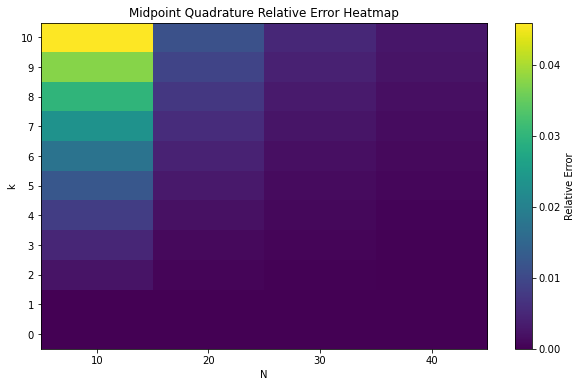

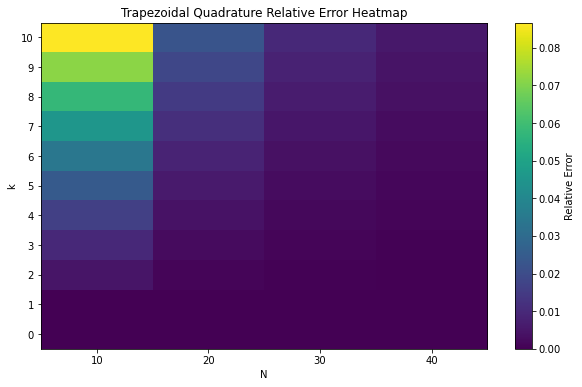

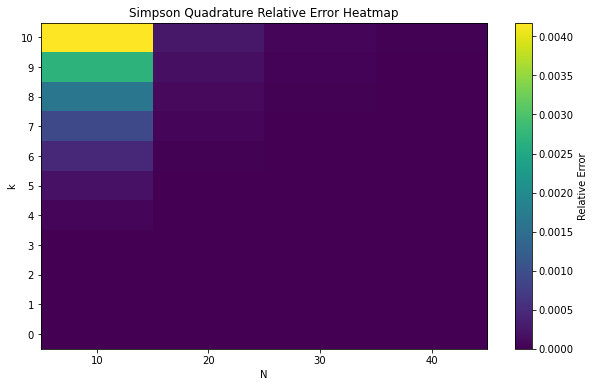

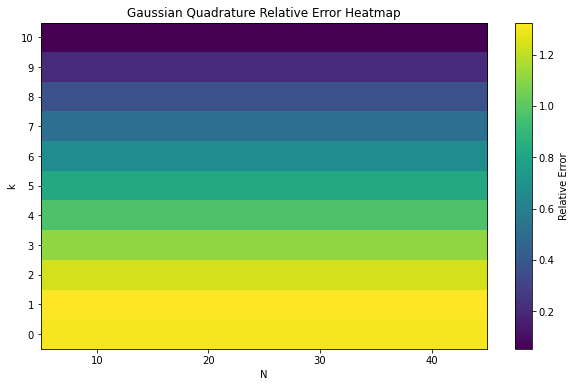

'--------------------Write your code above this line------------------------------'

In [47]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def gaussian_quadrature_weights_and_roots(M, a, b):
    def legendre_polynomial(x, m):
        return legendre(m)(x)

    roots = []
    weights = []

    for m in range(1, M + 1):
        x0 = np.cos((4 * m - 1) * np.pi / (4 * M + 2))
        root = newton(legendre_polynomial, x0, args=(m,))
        weight = 2 / ((1 - root**2) * legendre(m).deriv()(root)**2)
        roots.append(root)
        weights.append(weight)

    return np.array(roots), np.array(weights)

def mid_quad(f, a, b, N):
    h = (b - a) / N
    xi = np.linspace(a + h / 2, b - h / 2, N)
    return h * np.sum(f(xi))

def trapz_quad(f, a, b, N):
    h = (b - a) / N
    xi = np.linspace(a, b, N + 1)
    return (h / 2) * (f(xi[0]) + 2 * np.sum(f(xi[1:N])) + f(xi[N]))

def simpson_quad(f, a, b, N):
    h = (b - a) / N
    xi = np.linspace(a, b, N + 1)
    return (h / 3) * (f(xi[0]) + 4 * np.sum(f(xi[1:N:2])) + 2 * np.sum(f(xi[2:N-1:2])) + f(xi[N]))

def gauss_quad(f, a, b, N, order):
    def legendre_polynomial(x, m):
        return legendre(m)(x)

    roots, weights = gaussian_quadrature_weights_and_roots(order, a, b)
    return np.sum(weights * f((b - a) / 2 * roots + (a + b) / 2))

def true_integral_A(k, a, b):
    return (b**(k + 1) - a**(k + 1)) / (k + 1)

def true_integral_B(k, a, b):
    return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))

def relative_error(approx, true):
    return 2 * abs(true - approx) / (true + approx)


k_values = np.arange(0, 11)
N_values = np.arange(10, 50, 10)


mid_quad_errors = np.zeros((len(k_values), len(N_values)))
trapz_quad_errors = np.zeros((len(k_values), len(N_values)))
simpson_quad_errors = np.zeros((len(k_values), len(N_values)))
gauss_quad_errors = np.zeros((len(k_values), len(N_values)))


for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        true_A = true_integral_A(k, 0, 1)
        true_B = true_integral_B(k, 0, 1)

        mid_quad_value = mid_quad(lambda x: x**k, 0, 1, N)
        trapz_quad_value = trapz_quad(lambda x: x**k, 0, 1, N)
        simpson_quad_value = simpson_quad(lambda x: x**k, 0, 1, N)
        gauss_quad_value = gauss_quad(lambda x: x**k, 0, 1, N, order=5)

        mid_quad_errors[i, j] = relative_error(mid_quad_value, true_A)
        trapz_quad_errors[i, j] = relative_error(trapz_quad_value, true_A)
        simpson_quad_errors[i, j] = relative_error(simpson_quad_value, true_A)
        gauss_quad_errors[i, j] = relative_error(gauss_quad_value, true_A)


methods = ['Midpoint Quadrature', 'Trapezoidal Quadrature', 'Simpson Quadrature', 'Gaussian Quadrature']
errors = [mid_quad_errors, trapz_quad_errors, simpson_quad_errors, gauss_quad_errors]

for i, method in enumerate(methods):
    plt.figure(figsize=(10, 6))
    plt.imshow(errors[i], cmap='viridis', aspect='auto', origin='lower')
    plt.colorbar(label='Relative Error')
    plt.title(f'{method} Relative Error Heatmap')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.xticks(np.arange(len(N_values)), N_values)
    plt.yticks(np.arange(len(k_values)), k_values)
    plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$

## H) Fermi–Dirac


<ipython-input-47-63cec2cc6527>:48: RuntimeWarning: divide by zero encountered in long_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))
<ipython-input-47-63cec2cc6527>:48: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))


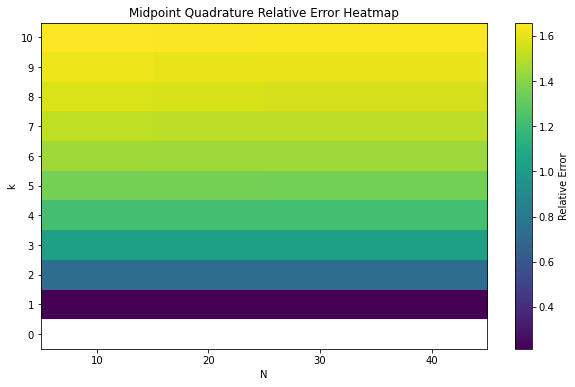

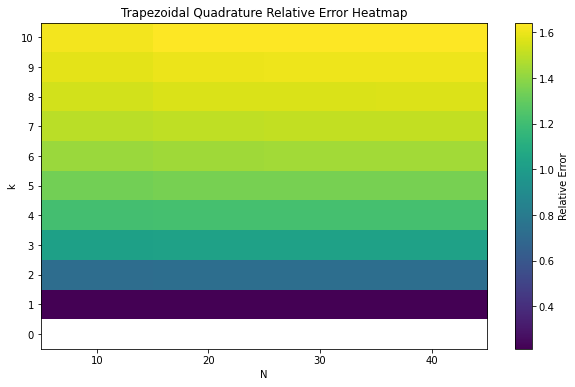

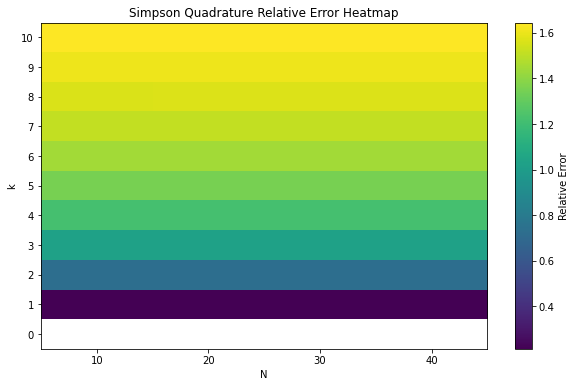

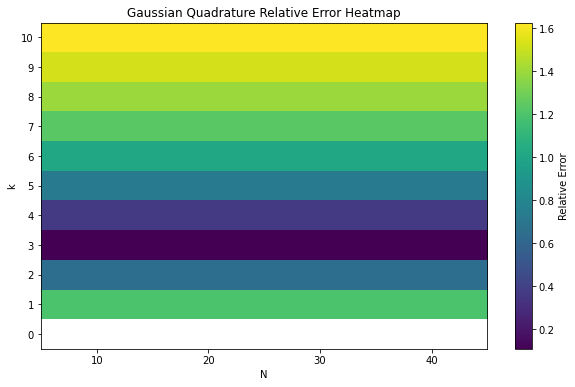

In [48]:
mid_quad_errors = np.zeros((len(k_values), len(N_values)))
trapz_quad_errors = np.zeros((len(k_values), len(N_values)))
simpson_quad_errors = np.zeros((len(k_values), len(N_values)))
gauss_quad_errors = np.zeros((len(k_values), len(N_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        true_B = true_integral_B(k, 0, 1)

        mid_quad_value = mid_quad(lambda x: x**k, 0, 1, N)
        trapz_quad_value = trapz_quad(lambda x: x**k, 0, 1, N)
        simpson_quad_value = simpson_quad(lambda x: x**k, 0, 1, N)
        gauss_quad_value = gauss_quad(lambda x: x**k, 0, 1, N, order=5)

        mid_quad_errors[i, j] = relative_error(mid_quad_value, true_B)
        trapz_quad_errors[i, j] = relative_error(trapz_quad_value, true_B)
        simpson_quad_errors[i, j] = relative_error(simpson_quad_value, true_B)
        gauss_quad_errors[i, j] = relative_error(gauss_quad_value, true_B)
        
methods = ['Midpoint Quadrature', 'Trapezoidal Quadrature', 'Simpson Quadrature', 'Gaussian Quadrature']
errors = [mid_quad_errors, trapz_quad_errors, simpson_quad_errors, gauss_quad_errors]

for i, method in enumerate(methods):
    plt.figure(figsize=(10, 6))
    plt.imshow(errors[i], cmap='viridis', aspect='auto', origin='lower')
    plt.colorbar(label='Relative Error')
    plt.title(f'{method} Relative Error Heatmap')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.xticks(np.arange(len(N_values)), N_values)
    plt.yticks(np.arange(len(k_values)), k_values)
    plt.show()

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [10]:
def V(x):
    
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    
    return np.sqrt(8) * (1 / np.sqrt(V(a) - V(x)))


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

Minimum N for which the absolute error is less than 0.0001: 5120
The error estimate for N = 5120 is 6.012000110500182e-05


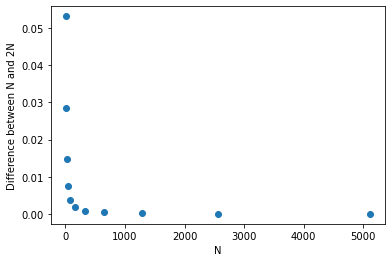

In [11]:
from scipy import integrate

'''--------------------Write your code below this line------------------------------'''

target_error = 1e-4
y = []
x = []
N = 5

while True:
    result_N, error_N = integrate.fixed_quad(lambda x: timep(x, 2), 0, 2, n = N)
    result_2N, error_2N = integrate.fixed_quad(lambda x: timep(x, 2), 0, 2, n = 2 * N)
    
    absolute_error = np.abs(result_N - result_2N)
    x.append(N)
    y.append(absolute_error)
    if absolute_error < target_error:
        break
    N *= 2
    
print(f"Minimum N for which the absolute error is less than {target_error}: {N}")
print(f"The error estimate for N = 5120 is {absolute_error}")
plt.plot(x, y, linestyle = '', marker = 'o')
plt.xlabel("N")
plt.ylabel("Difference between N and 2N")
plt.show()


## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [12]:


'''--------------------Write your code below this line------------------------------'''
result_quad, error_quad = integrate.quad(lambda x: timep(x, 2), 0, 2)

print(f"Error estimate from quad method: {error_quad}")
print("The error from the quad method is significanlly lower compare to the fixed_quad method")

Error estimate from quad method: 2.0068946504636642e-10
The error from the quad method is significanlly lower compare to the fixed_quad method


 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [49]:


'''--------------------Write your code below this line------------------------------'''
#result_integration = integrate.romberg(lambda x: timep(x, 2), 0, 2)
print("Due to the method that was used in Romberg integration, this method does not do well when it comes to integrating periodic functions.")
print("So when calculating the result in this case, if the range we set the integration does not contain one period, we can not just use a romberg(func, 0, a)")
print("Plus since the orginal function is undefine at 0 and a, romberg method does not work with diverging functions at boundires.")

Due to the method that was used in Romberg integration, this method does not do well when it comes to integrating periodic functions.
So when calculating the result in this case, if the range we set the integration does not contain one period, we can not just use a romberg(func, 0, a)
Plus since the orginal function is undefine at 0 and a, romberg method does not work with diverging functions at boundires.


## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [23]:


'''--------------------Write your code below this line------------------------------'''
uncer = 1e-5
a = 2
result, error_estimate = integrate.romberg(timep, 0, 2 - uncer , args = (a, ),  tol = uncer, divmax=10, show=True)

print(f"Estimated result: {result}")
print(f"Estimated error: {error_estimate}")
'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001C7EF8B21F0> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157  1.921155  1.921155  1.921155 

The final re

C:\Users\yibow\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:832: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.299910e-02
  warnings.warn(


TypeError: cannot unpack non-iterable numpy.float64 object

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [24]:


'''--------------------Write your code below this line------------------------------'''
uncer = 1e-5
print("The accurancy is changed by 0.0697612273714")
result, error_estimate = integrate.romberg(timep, 0, 2 - uncer, args = (a,),  tol = uncer, divmax=15, show=True)


'''--------------------Write your code above this line------------------------------'''

The accurancy is changed by 0.0697612273714
Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001C7EF8B2F70> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157 

C:\Users\yibow\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:832: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.213942e-03
  warnings.warn(


TypeError: cannot unpack non-iterable numpy.float64 object

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

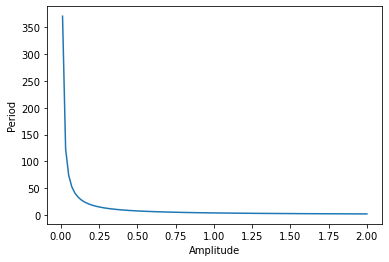

'--------------------Write your code above this line------------------------------'

In [25]:


'''--------------------Write your code below this line------------------------------'''
Amplitude = np.linspace(0.01, 2, 100)
periods = []
for a in Amplitude:
    # Set the integration limits
    lower_limit = 0
    upper_limit = a
    
    # Perform the integration to calculate the period
    result, _ = integrate.quad(timep, lower_limit, upper_limit, args=(a,))
    
    # Append the result to the periods list
    periods.append(result)
    
plt.plot(Amplitude, periods)
plt.xlabel("Amplitude")
plt.ylabel("Period")
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [27]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    numerator = z ** 3
    denominator = (1 - z)**5 * (np.exp(z / (1 - z)) - 1)
    return prefactor * (numerator / denominator)

def integral(z):
    integral, _ = integrate.quad(blackbody_var, 0, 1)
    return integral


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [28]:



N = 20
stfconst_fq, _ = integrate.fixed_quad(blackbody_var, 0, 1, n = N)
print(f"The Stefan Boltazmann constant from the fixed_quad method is given as:{stfconst_fq}")


The Stefan Boltazmann constant from the fixed_quad method is given as:5.662095850366909e-08


## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [29]:
from scipy.integrate import quad

'''--------------------Write your code below this line------------------------------'''
def blackbody(x):
    return prefactor * (x**3 / (np.exp(x) - 1))

def integrate(x):
    result, _ = quad(blackbody, 0, np.inf)
    return result

result_quad = integrate(1)
difference = np.abs(result_quad - stfconst_fq)

print(f"The result from thjje quad function from 0 to positive infinty is given as :{result_quad}")
print(f"The difference from the quad method anf teh fixed_quad method is given as:{difference}")

The result from thjje quad function from 0 to positive infinty is given as :5.6627031974081604e-08
The difference from the quad method anf teh fixed_quad method is given as:6.073470412512604e-12


<ipython-input-29-fdd967fa72bd>:5: RuntimeWarning: overflow encountered in exp
  return prefactor * (x**3 / (np.exp(x) - 1))


<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


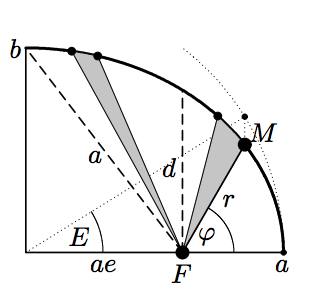


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

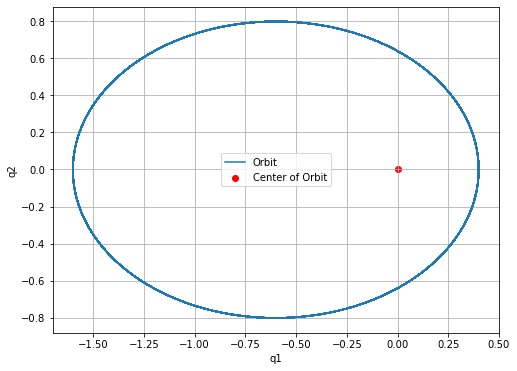

In [3]:


'''--------------------Write your code below this line------------------------------'''
e = 0.6
T_f = 200
delta_t = 200/400000
Totl_step = int(T_f / delta_t)  

q_1 = 1 - e
q_2 = 0
q_1dot = 0 
q_2dot = np.sqrt((1+e)/(1-e))

q_1val = [q_1]
q_2val = [q_2]

def acceleration(q1, q2):
    denominator = (q1**2+ q_2**2)**(3/2)
    q_1acce = -q1 / denominator
    q_2acce = -q2 / denominator
    return q_1acce, q_2acce

for i in range(Totl_step):
    q_1acce, q_2acce = acceleration(q_1, q_2)
    
    q_1dot += delta_t *  q_1acce
    q_2dot += delta_t *  q_2acce
    
    q_1 += delta_t * q_1dot
    q_2 += delta_t * q_2dot
    
    q_1val.append(q_1)
    q_2val.append(q_2)


plt.figure(figsize=(8, 6))
plt.plot(q_1val, q_2val, label = "Orbit" )
plt.scatter([0], [0], color = 'red', marker = 'o', label = 'Center of Orbit')
plt.xlabel('q1')
plt.ylabel('q2')
plt.legend()
plt.grid(True)
plt.show()

Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

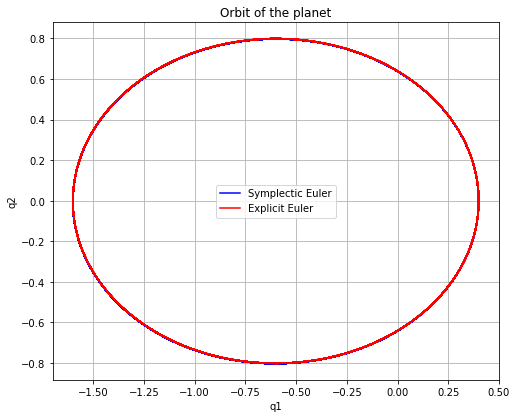

In [8]:
def H_p(p):
    return p

def H_q (q):
    denominator = (q[0]**2 + q[1]**2)
    return q / denominator**(3/2)

def Symplectic_orbit(p0, q0, dt, Steps):
    p = np.array(p0, dtype = float)
    q = np.array(q0, dtype = float)
    orbit = [(q[0], q[1])]
    
    for i in range(Steps):
        p -= dt * H_q(q)
        q += dt * H_p(p)
        orbit.append((q[0], q[1]))
    
    return np.array(orbit)

q = [1 - e, 0]
p = [0, np.sqrt((1+e)/(1-e))]

orbit = Symplectic_orbit(q, p, delta_t, Totl_step)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(orbit_symplectic[:, 0], orbit_symplectic[:, 1], label='Symplectic Euler', color='blue')
plt.plot(q_1val, q_2val, label = "Explicit Euler", color = 'red' )
ax.set_aspect('equal')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_title('Orbit of the planet')
ax.grid(True)
ax.legend()
plt.show()